In [ ]:
#Komal Kumari(MT19124)
#Sonali(MT19081)
#Bhakti(MT19115)
#Prerna verma(MT19079)

In [99]:
import numpy as np
import pandas as pd
import shutil
import skimage.io
from sklearn.ensemble import BaggingClassifier
import os
import imutils
from sklearn.metrics import confusion_matrix
import skimage.transform
from sklearn.neural_network import MLPClassifier
from os import listdir
from sklearn.ensemble import GradientBoostingClassifier
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py
import matplotlib.pyplot as plt 
from skimage.feature import hog
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

Data balancing by vertical flipping of images

In [39]:
def imageAugmntation(image,count,target_dir):
    img=cv2.imread(image) 
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    vertical_img = img.copy()
    vertical_img = cv2.flip( img, 1 )
    cv2.imwrite(target_dir+'/'+'Train_'+str(count)+'.jpg',cv2.cvtColor(vertical_img, cv2.COLOR_BGR2RGB))

Setting parameters

In [81]:
size=tuple((500, 500))
train_path="./brain_tumor_dataset/"
h5_data='./output/Take_6/data.h5'
h5_labels='./output/Take_6/labels.h5'
bins=8
seed=9
scoring="accuracy"
test_size=0.10
num_trees=700

In [43]:
train_labels = os.listdir(train_path)
train_labels = list(map(int, train_labels))
train_labels.sort()
print("Training Labels:",train_labels)
globalFeat = []
labels=[]

Training Labels: [0, 1]


In [ ]:
#changing names
# count=1
# for training_name in train_labels: #data balancing
#     # join the training data path and each species training folder
#     dir = os.path.join(train_path, str(training_name))
#     for file in listdir(dir):
#         if not file.startswith('.'):
#             os.rename(dir+'/'+file,dir+'/Train_'+str(count)+'.jpg')
#         print(count)
#         count+=1

Checking Shapes of the dataset

In [45]:
#checking shapes
for training_name in train_labels: #data balancing
    dir = os.path.join(train_path, str(training_name))
    for f in os.listdir(dir):
        if not f.startswith('.'):
            img = cv2.imread(dir+'/'+f)
            print("shape:",img.shape)

shape: (442, 442, 3)
shape: (251, 201, 3)
shape: (400, 393, 3)
shape: (442, 441, 3)
shape: (225, 225, 3)
shape: (183, 275, 3)
shape: (417, 428, 3)
shape: (474, 356, 3)
shape: (361, 642, 3)
shape: (214, 235, 3)
shape: (238, 212, 3)
shape: (725, 728, 3)
shape: (630, 630, 3)
shape: (393, 350, 3)
shape: (200, 300, 3)
shape: (630, 630, 3)
shape: (221, 228, 3)
shape: (252, 200, 3)
shape: (201, 173, 3)
shape: (251, 201, 3)
shape: (444, 468, 3)
shape: (225, 225, 3)
shape: (326, 276, 3)
shape: (168, 300, 3)
shape: (630, 630, 3)
shape: (168, 300, 3)
shape: (250, 201, 3)
shape: (200, 200, 3)
shape: (630, 630, 3)
shape: (222, 227, 3)
shape: (244, 206, 3)
shape: (400, 393, 3)
shape: (236, 214, 3)
shape: (217, 232, 3)
shape: (530, 380, 3)
shape: (225, 225, 3)
shape: (225, 225, 3)
shape: (252, 200, 3)
shape: (217, 232, 3)
shape: (201, 173, 3)
shape: (338, 276, 3)
shape: (192, 192, 3)
shape: (225, 225, 3)
shape: (225, 225, 3)
shape: (340, 339, 3)
shape: (454, 442, 3)
shape: (614, 630, 3)
shape: (262, 

Cropping fo images by Gray Scale conversion, median flitering, erosion, dilationa and finding contours.

In [ ]:
def crop_imgs(img, add_pixels_value=0):
        #gray scale conversion of images
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        #median filtering of image
        median = cv2.medianBlur(gray, 5)
        
        #image thresholding
        thresh = cv2.threshold(median, 45, 255, cv2.THRESH_BINARY)[1]
        
        #image erosion
        thresh_erode = cv2.erode(thresh, None, iterations=2)
        
        #image dilation
        thresh_dilate = cv2.dilate(thresh_erode, None, iterations=2)
        
        #contouring of image
        cnts = cv2.findContours(thresh_dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])
        ADD_PIXELS = add_pixels_value
        
        #forming new image
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        #print("hhe;p")
        return new_img
        
        
for training_name in train_labels: 
    dir = os.path.join(train_path, str(training_name))
    for f in os.listdir(dir):
        if not f.startswith('.'):
            img = cv2.imread(dir+'/'+f)
            new_img=crop_imgs(img, add_pixels_value=0)
            cv2.imwrite(dir+'/'+f, new_img)

Main code for data augmentation for data balancing

In [49]:
for training_name in train_labels: #data balancing
    dir = os.path.join(train_path, str(training_name))
    count=0
    for f in os.listdir(dir):
        if not f.startswith('.'):
            count+=1 
    file_name=254
    for file in listdir(dir):
        if not file.startswith('.'):
            if(count<155):
                imageAugmntation(dir+'/'+file,file_name,dir)
                file_name+=1
                count+=1

Feature Selection/Extraction Methods

In [112]:
#HOG feature extaction
def hogD(image,hog_pixels_per_cell=64,hog_cells_per_block=1):# hog features
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hog_desriptor=hog(gray,orientations=8,pixels_per_cell=(hog_pixels_per_cell,hog_pixels_per_cell),cells_per_block=(hog_cells_per_block, hog_cells_per_block),feature_vector=True)
    return hog_desriptor

In [50]:
#HU-Moments feature selection
def hu_momentsF(image):# hu_moments features
    image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    feature=cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [51]:
#Haralick feature selection
def haralickF(image): #haralick feature
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    haralick=mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [52]:
#Colour Histogram Feature selection
def histogramF(image, mask=None): #histogram featurs
    image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hist=cv2.calcHist([image],[0, 1, 2],None,[bins, bins, bins],[0, 256, 0, 256, 0, 256])
    cv2.normalize(hist,hist)
    return hist.flatten()

Main code for feature selection/extraction and merging of features from different methods

In [53]:
training_data_feature_map={} #combining all features generated
daisy_descriptor_list=[]
for training_name in train_labels:
    dir=os.path.join(train_path, str(training_name))
    label=training_name
    for file in listdir(dir):
        image=cv2.imread(dir+'/'+file)
        image=cv2.resize(image,size)
        haralick=haralickF(image)
        hu_moments=hu_momentsF(image)
        histogram=histogramF(image)
        globalF=np.hstack([histogram, haralick, hu_moments])
        labels.append(label)
        globalFeat.append(globalF)
print("Done")

Done


Saving features extracted`

In [55]:
print("Shape of features extracted:",np.array(globalFeat).shape)
target=labels
scaler=MinMaxScaler(feature_range=(0, 1))
scaled=scaler.fit_transform(globalFeat)
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1',data=np.array(scaled))
h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1',data=np.array(target))
h5f_data.close()
h5f_label.close()

Shape of features extracted: (310, 532)


Defining models onto which training dataset will be fed

In [62]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_depth=50,random_state=0,min_samples_split=2)))
models.append(('GB',GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)))
models.append(('NB', GaussianNB()))
svm=SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005,random_state=seed)
models.append(('Bagged SVM', BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=42) ))
models.append(('SVM', SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005,random_state=seed)))

results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

Train-Test Split of dataset

In [63]:
(train, test, trainLabels, testLabels) = train_test_split(np.array(global_features),np.array(global_labels),test_size=test_size,random_state=seed)                                           
print("Train data  :",train.shape)
print("Test data   :",test.shape)
print("Train labels:",train.shape)
print("Test labels :",test.shape)

Train data  : (279, 532)
Test data   : (31, 532)
Train labels: (279, 532)
Test labels : (31, 532)


Cross Validation on 5-Folds fro training the models and comparing the perfromances

Training Dataset Evaluation

1. Accuarcy Score permonce comparison

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.698810 (0.086676)
LDA: 0.710053 (0.092983)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.684921 (0.073540)
CART: 0.795899 (0.082697)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.849339 (0.039004)
GB: 0.634259 (0.039772)
NB: 0.548280 (0.120052)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Bagged SVM: 0.662963 (0.060786)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.619974 (0.088118)


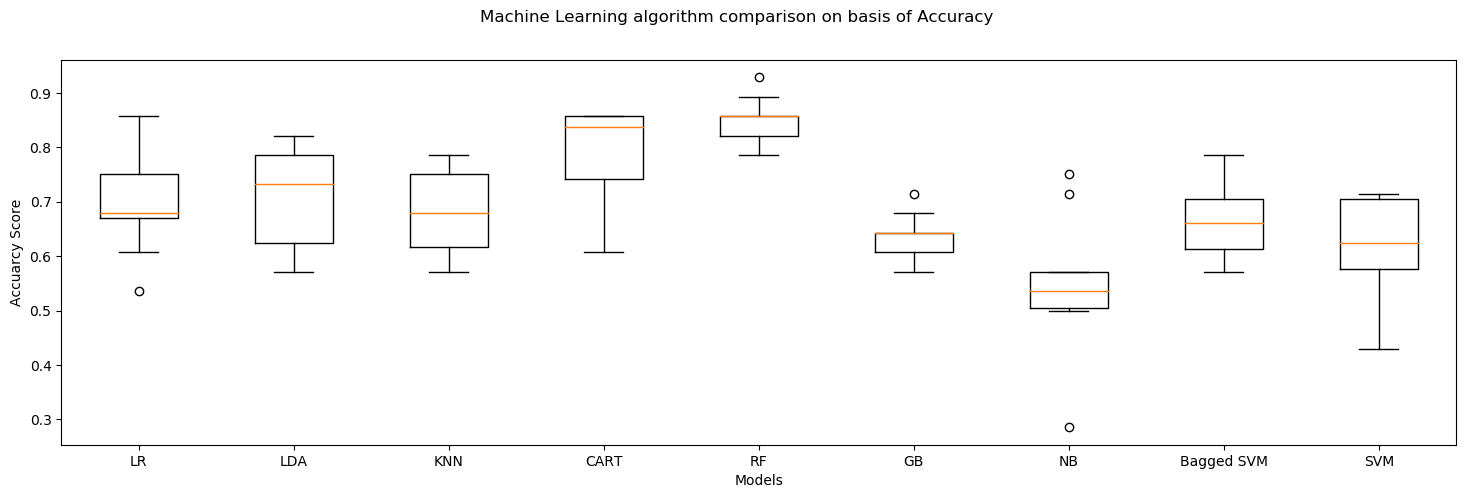

In [83]:
results = []
names   = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, train, trainLabels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = pyplot.figure(figsize=(18,5))
fig.suptitle('Machine Learning algorithm comparison on basis of Accuracy')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
ax.set_xlabel('Models')
ax.set_ylabel('Accuarcy Score')
pyplot.show()

2. Sensitivity/Recall basis performance comaprison

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.738105 (0.131724)
LDA: 0.713857 (0.134482)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.702079 (0.132389)
CART: 0.770365 (0.099120)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.832823 (0.061120)
GB: 0.694125 (0.106693)
NB: 0.144771 (0.117407)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Bagged SVM: 0.648956 (0.080017)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.568474 (0.135721)


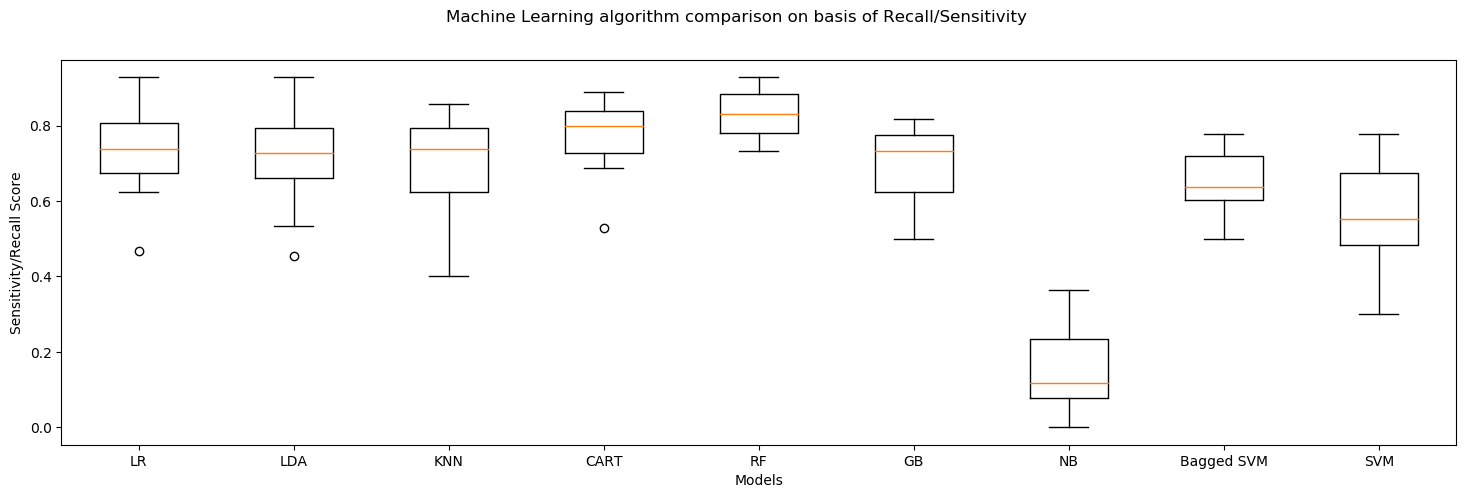

In [84]:
results=[]
names=[]
scoring='recall'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, train, trainLabels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure(figsize=(18,5))
fig.suptitle('Machine Learning algorithm comparison on basis of Recall/Sensitivity')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
ax.set_xlabel('Models')
ax.set_ylabel('Sensitivity/Recall Score')
pyplot.show()

3. Precision basis performance comaprison

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.698669 (0.128931)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.710195 (0.134474)
KNN: 0.696331 (0.113295)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.821268 (0.087511)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.862464 (0.066013)
GB: 0.642654 (0.130098)
NB: 0.680000 (0.389358)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being

Bagged SVM: 0.693824 (0.104472)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.668736 (0.092933)


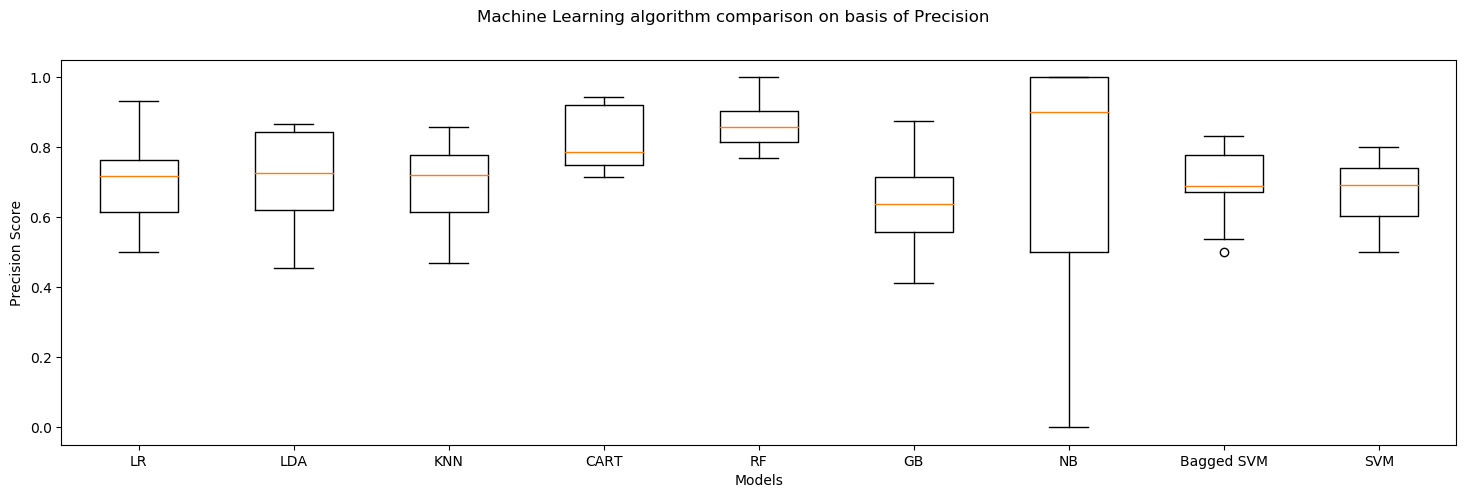

In [85]:
scoring='precision'
results=[]
names=[]
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, train, trainLabels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure(figsize=(18,5))
fig.suptitle('Machine Learning algorithm comparison on basis of Precision ')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
ax.set_xlabel('Models')
ax.set_ylabel('Precision Score')
pyplot.show()

4. F1-score basis performance comaprison

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.706487 (0.098544)
LDA: 0.706444 (0.116596)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.685517 (0.090874)
CART: 0.790809 (0.077613)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.844861 (0.043449)
GB: 0.650614 (0.066537)
NB: 0.231206 (0.172277)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Bagged SVM: 0.659649 (0.042097)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.596571 (0.074544)


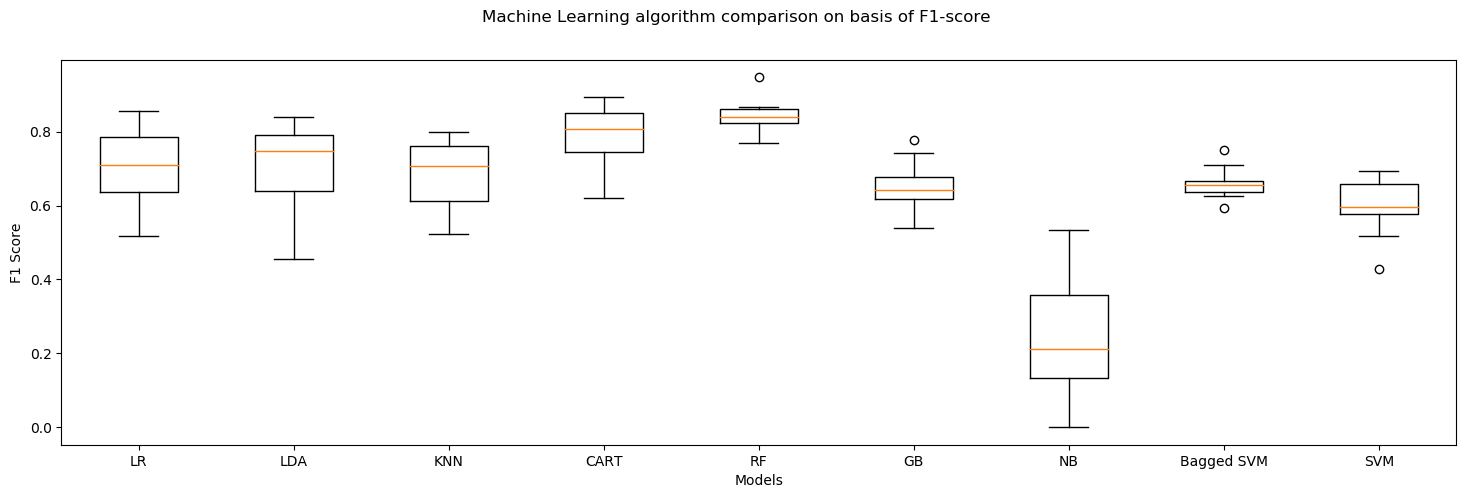

In [86]:
scoring='f1'
results=[]
names=[]
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, train, trainLabels, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure(figsize=(18,5))
fig.suptitle('Machine Learning algorithm comparison on basis of F1-score')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
pyplot.show()

Testing Dataset Evalaution

 1. Accuarcy Score permonce comparison

LR: 0.806452
LDA: 0.741935
KNN: 0.935484
CART: 0.870968
RF: 0.967742
GB: 0.806452
NB: 0.580645
Bagged SVM: 0.677419
SVM: 0.709677


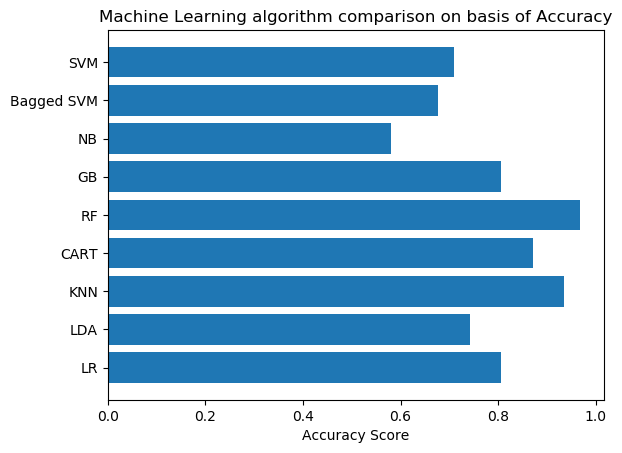

In [108]:
results=[]
names=[]
for name, model in models:
    #print(model)
    model.fit(train,trainLabels)
    y_pred=model.predict(test)
    temp=accuracy_score(testLabels,y_pred)
    results.append(temp)
    names.append(name)
    msg = "%s: %f" % (name,temp)
    print(msg)

y_pos = np.arange(len(names))
plt.barh(y_pos, results,)
plt.yticks(y_pos, names)
plt.title("Machine Learning algorithm comparison on basis of Accuracy")
plt.xlabel('Accuracy Score')
color=(0.2, 0.4, 0.6, 0.6)
plt.show()

2. Sensitivity/Recall basis performance comaprison

LR: 0.916667
LDA: 0.916667
KNN: 0.916667
CART: 0.750000
RF: 1.000000
GB: 0.750000
NB: 0.000000
Bagged SVM: 0.750000
SVM: 0.666667


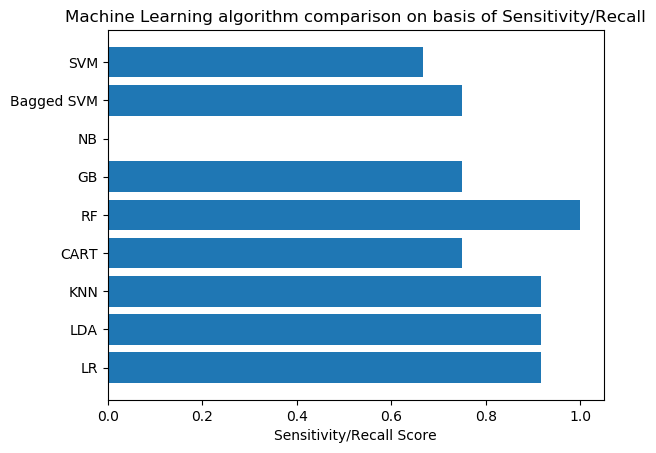

In [109]:
results=[]
names=[]
for name, model in models:
    #print(model)
    model.fit(train,trainLabels)
    y_pred=model.predict(test)
    temp=recall_score(testLabels,y_pred)
    results.append(temp)
    names.append(name)
    msg = "%s: %f" % (name,temp)
    print(msg)

y_pos = np.arange(len(names))
plt.barh(y_pos, results)
plt.yticks(y_pos, names)
plt.title("Machine Learning algorithm comparison on basis of Sensitivity/Recall")
plt.xlabel('Sensitivity/Recall Score')
plt.show()

3. Precision basis performance comaprison

LR: 0.687500
LDA: 0.611111
KNN: 0.916667
CART: 0.900000
RF: 0.923077
GB: 0.750000
NB: 0.000000
Bagged SVM: 0.562500
SVM: 0.615385


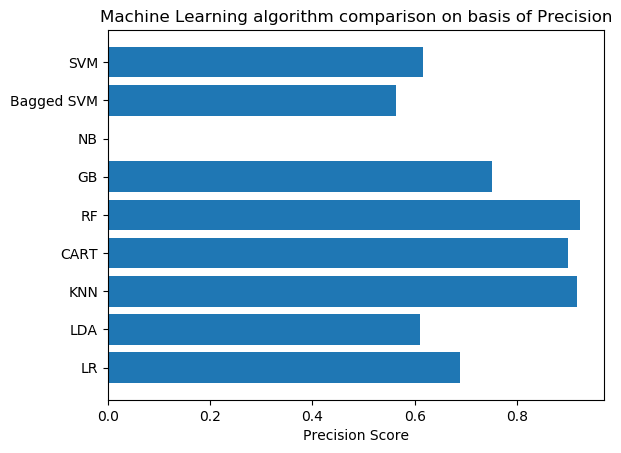

In [110]:
results=[]
names=[]
for name, model in models:
    #print(model)
    model.fit(train,trainLabels)
    y_pred=model.predict(test)
    temp=precision_score(testLabels,y_pred)
    results.append(temp)
    names.append(name)
    msg = "%s: %f" % (name,temp)
    print(msg)

y_pos = np.arange(len(names))
plt.barh(y_pos, results)
plt.yticks(y_pos, names)
plt.title("Machine Learning algorithm comparison on basis of Precision")
plt.xlabel('Precision Score')
plt.show()

In [ ]:
4. F1-score basis performance comaprison

LR: 0.785714
LDA: 0.733333
KNN: 0.916667
CART: 0.818182
RF: 0.960000
GB: 0.750000
NB: 0.000000
Bagged SVM: 0.642857
SVM: 0.640000


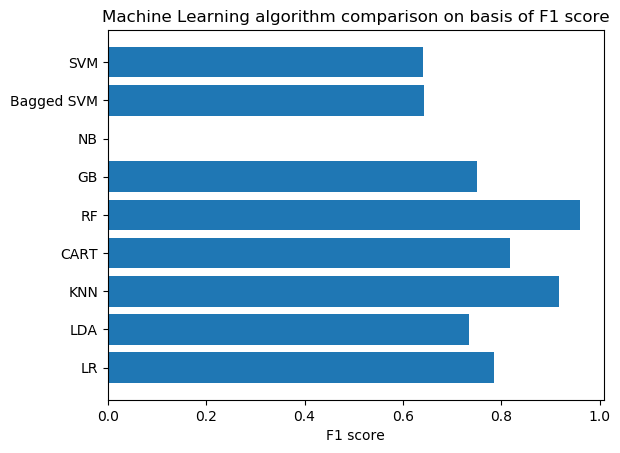

In [111]:
results=[]
names=[]
for name, model in models:
    #print(model)
    model.fit(train,trainLabels)
    y_pred=model.predict(test)
    temp=f1_score(testLabels,y_pred)
    results.append(temp)
    names.append(name)
    msg = "%s: %f" % (name,temp)
    print(msg)

y_pos = np.arange(len(names))
plt.barh(y_pos, results)
plt.yticks(y_pos, names)
plt.title("Machine Learning algorithm comparison on basis of F1 score")
plt.xlabel('F1 score')
plt.show()

5. Specificity basis performance comaprison

LR: 0.736842
LDA: 0.631579
KNN: 0.947368
CART: 0.947368
RF: 0.947368
GB: 0.842105
NB: 0.947368
Bagged SVM: 0.631579
SVM: 0.736842


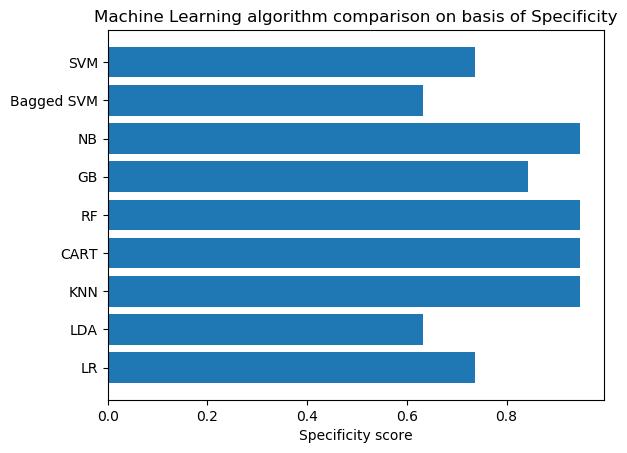

In [100]:
results=[]
names=[]
for name, model in models:
    #print(model)
    model.fit(train,trainLabels)
    y_pred=model.predict(test)
    tn, fp, fn, tp = confusion_matrix(testLabels,y_pred).ravel()
    temp=tn / (tn + fp)
    results.append(temp)
    names.append(name)
    msg = "%s: %f" % (name,temp)
    print(msg)

y_pos = np.arange(len(names))
plt.barh(y_pos, results)
plt.yticks(y_pos, names)
plt.title("Machine Learning algorithm comparison on basis of Specificity")
plt.xlabel('Specificity score')
plt.show()